Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil

# Find the Root of the Function

Let's start by looking at a sample function and plotting it

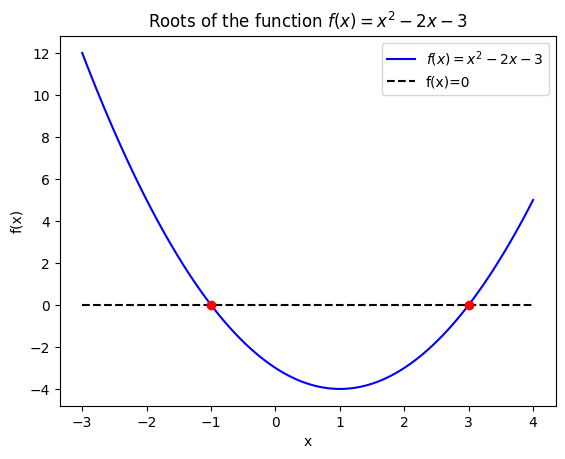

In [3]:
# original function
def f(x):
    return x**2 - 2*x - 3

# first derivative
def df(x):
    return 2*x - 2

# second derivative
def ddf(x):
    return 2

# third derivative
def dddf(x):
    return 0

x = np.linspace(-3,4,100)

plt.plot(x,f(x),'b-',label=r'$f(x) = x^2 - 2x - 3$')
plt.plot(x,np.zeros(x.shape),'k--',label=r'f(x)=0')
plt.plot(-1,0,'ro')
plt.plot(3,0,'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Roots of the function $f(x) = x^2 - 2x - 3$')
plt.legend()
plt.show()

# Bisection Method

Bisection method algorithm

In [4]:
def bisection(func,dFunc,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** BISECTION METHOD ***')

    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True
    
    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'Not Convergent within {maxIter} iterations')
            break
        
        # calculate midpoint
        xNew = (x0 + x1)/2
        
        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew

        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))
        
        # log iteration and absolute error
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'absolute error: {func(xNew)}\n')

    return xNew, iterations, errors

How many iterations will it take to converge?

In [5]:
def bisectionNumIterations(x0,x1,eps):
    #==================================================================
    # INPUTS
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    # OUTPUT
    #   - maxIter: max number of iterations to converge
    #==================================================================
    maxIter = ceil(log2(abs(x1-x0) / eps))
    return maxIter

x0 = -5
x1 = 1
tol = 1e-6

numIter = bisectionNumIterations(x0,x1,tol)
print(f'x0 = {x0}')
print(f'x1 = {x1}')
print(f'error tolerance = {tol}')
print('------------------')
print(f'MAX ITERATIONS TO CONVERGE WITH BISECTION = {numIter}')

x0 = -5
x1 = 1
error tolerance = 1e-06
------------------
MAX ITERATIONS TO CONVERGE WITH BISECTION = 23


Test the algorithm and plot it

*** BISECTION METHOD ***
final x-value: -1.0000009536743164
iterations: 21
absolute error: 3.814698175119702e-06



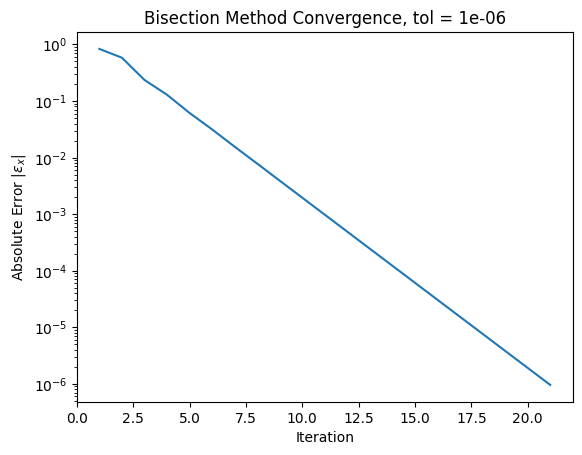

In [26]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = bisection(f,df,x0,x1,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Bisection Method Convergence, tol = {tol}')
plt.show()

# Secant Method

Secant method algorithm

In [7]:
def secant(func,dFunc,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** SECANT METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply secant method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        x0 = x1
        x1 = xNew

        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))
        
        # log iteration and error
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')

    return xNew, iterations, errors

Test the algorithm and plot it

*** SECANT METHOD ***
final x-value: -0.9999999997671694
iterations: 9
error: -9.313225746154785e-10



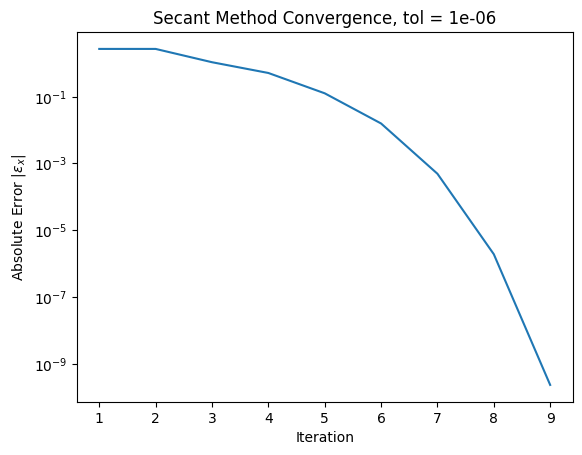

In [8]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = secant(f,df,x0,x1,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Secant Method Convergence, tol = {tol}')
plt.show()

# Regula-Falsi Method

Regula-Falsi method algorithm

In [9]:
def regula_falsi(func,dFunc,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Regula-Falsi method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))

        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew
        
        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))

        # log iteration and error
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')

    return xNew, iterations, errors

Test the algorithm and plot it

*** REGULA-FALSI METHOD ***
final x-value: -0.999999046325911
iterations: 22
error: -3.8146954466355965e-06



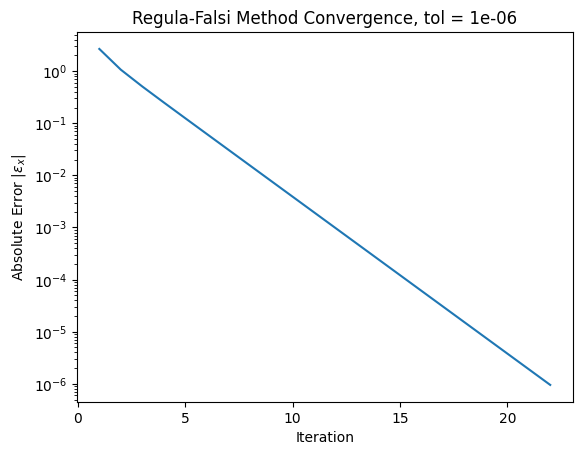

In [10]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, errors = regula_falsi(f,df,x0,x1,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Regula-Falsi Method Convergence, tol = {tol}')
plt.show()

# Fixed Point Iterative Method

Define functions of the form `x = g(x)` and plot them

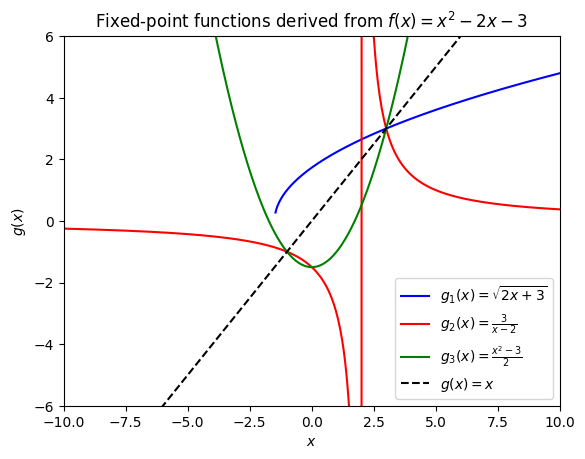

In [11]:
def g1(x):
    return np.sqrt(2*x + 3)

def g2(x):
    return 3 / (x-2)

def g3(x):
    return (x**2 - 3) / 2

x = np.linspace(-10,10,500)

plt.plot(x[x>=-3/2],g1(x[x>=-3/2]),'b',label=r'$g_1(x) = \sqrt{2x+3}$')
plt.plot(x,g2(x),'r',label=r'$g_2(x) = \frac{3}{x-2}$')
plt.plot(x,g3(x),'g',label=r'$g_3(x) = \frac{x^2-3}{2}$')
plt.plot(x,x,'k--',label=r'$g(x) = x$')
plt.xlim([-10,10])
plt.ylim([-6,6])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.title(r'Fixed-point functions derived from $f(x) = x^2 - 2x - 3$')
plt.legend()
plt.show()

Range of convergence

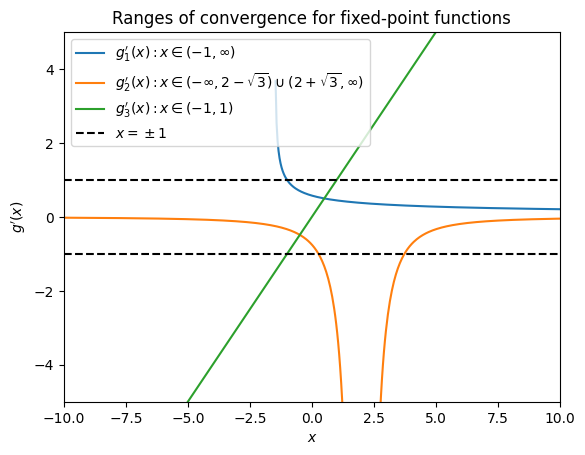

In [12]:
def dg1(x):
    return (2*x + 3)**(-1/2)

def dg2(x):
    return -3 * (x-2)**(-2)

def dg3(x):
    return x

x = np.linspace(-10,10,500)

plt.plot(x[x>-3/2],dg1(x[x>-3/2]),label=r'$g^\prime_1(x): x \in (-1,\infty)$')
plt.plot(x,dg2(x),label=r'$g^\prime_2(x): x \in (-\infty,2-\sqrt{3}) \cup (2+\sqrt{3},\infty)$')
plt.plot(x,dg3(x),label=r'$g^\prime_3(x): x \in (-1,1)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$x = \pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Ranges of convergence for fixed-point functions')
plt.legend()
plt.show()

Fixed-point iterative algorithm

In [13]:
def fixed_point_iteration(func,dFunc,gFunc,x,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle for f(x)
    #   - dFunc: function handle for f'(x)
    #   - gFunc: function handle for g(x)
    #   - x: initial guess
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** FIXED POINT ITERATION METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []
    xList = [x]

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:        
        # check for convergence
        if i >= 3:
            if abs(xList[-1] - xList[i-2]) > abs(xList[i-2] - xList[i-3]):
                print('ERROR: g(x) does not meet convergence criteria')
                break
        
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break

        # calculate new x-value and apply fixed point iteration algorithm
        xNew = gFunc(x)
        x = xNew

        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))

        # log x, iteration, and error
        xList.append(xNew)
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')
        
    return xNew, iterations, errors

Test the algorithm and plot it

*** FIXED POINT ITERATION METHOD ***
final x-value: 2.9999996132053535
iterations: 15
error: -1.5471784360343577e-06

*** FIXED POINT ITERATION METHOD ***
final x-value: -1.000000358414589
iterations: 13
error: 1.433658484373268e-06

*** FIXED POINT ITERATION METHOD ***
ERROR: Not Convergent within 100000.0 iterations
final x-value: -0.9955233755617962
iterations: 100000
error: -0.017886457586454796



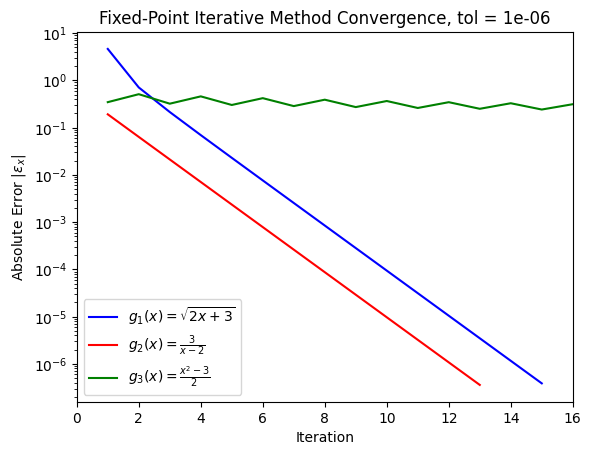

In [14]:
x0 = -0.5
tol = 1e-6

xNew1, iterations1, errors1 = fixed_point_iteration(f,df,g1,x0,tol)
xNew2, iterations2, errors2 = fixed_point_iteration(f,df,g2,x0,tol)
xNew3, iterations3, errors3 = fixed_point_iteration(f,df,g3,x0,tol)

plt.semilogy(iterations1,errors1,'b',label=r'$g_1(x) = \sqrt{2x+3}$')
plt.semilogy(iterations2,errors2,'r',label=r'$g_2(x) = \frac{3}{x-2}$')
plt.semilogy(iterations3,errors3,'g',label=r'$g_3(x) = \frac{x^2-3}{2}$')
plt.xlim([0,max(iterations1[-1],iterations2[-1])+1])
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Fixed-Point Iterative Method Convergence, tol = {tol}')
plt.legend()
plt.show()

# Newton-Raphson Method

Newton-Raphson method algorithm

In [15]:
def newton_raphson(func,dFunc,x,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x: initial guess
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** NEWTON-RAPHSON METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []
    xNew = x

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if dFunc(x) == 0:
            print(f'ERROR: Divide by zero')
            break

        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Newton-Raphson algorithm
        xNew = x - func(x)/dFunc(x)
        x = xNew

        # compute new absolute error
        errorNew = abs(func(xNew) / dFunc(xNew))

        # log iteration and error
        iterations.append(i)
        errors.append(errorNew)
        
        # set new tolerance condition for the while loop to check
        condition = errorNew > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')
        
    return xNew, iterations, errors

Visualize fixed-point function

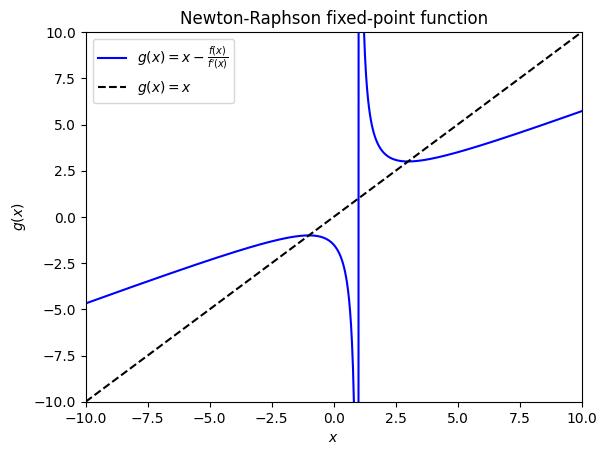

In [16]:
def g(func,dFunc,x):
    return x - func(x)/dFunc(x)

x = np.linspace(-10,10,500)

plt.plot(x,g(f,df,x),'b',label=r'$g(x) = x - \frac{f(x)}{f^\prime(x)}$')
plt.plot(x,x,'k--',label=r'$g(x) = x$')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.title(r'Newton-Raphson fixed-point function')
plt.legend()
plt.show()

Range of convergence

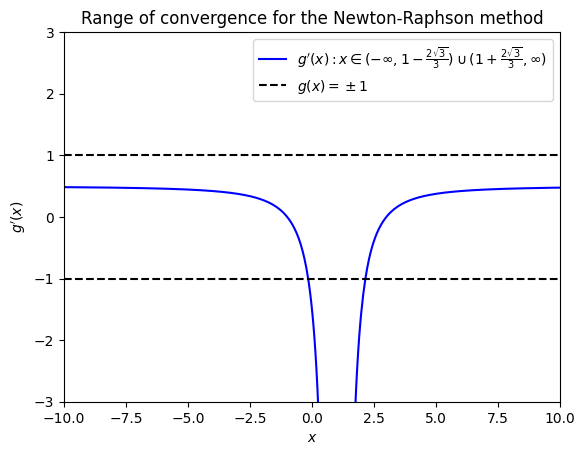

In [17]:
def dg(func,dFunc,ddFunc,x):
    return func(x)*ddFunc(x) / dFunc(x)**2

x = np.linspace(-10,10,500)

plt.plot(x,dg(f,df,ddf,x),'b-',label=r'$g^\prime(x): x \in (-\infty,1-\frac{2\sqrt{3}}{3}) \cup (1+\frac{2\sqrt{3}}{3},\infty)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$g(x) = \pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-10,10])
plt.ylim([-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Range of convergence for the Newton-Raphson method')
plt.legend()
plt.show()

Test the algorithm and plot it

*** NEWTON-RAPHSON METHOD ***
final x-value: -1.0000006938662227
iterations: 3
error: 2.77546537219564e-06



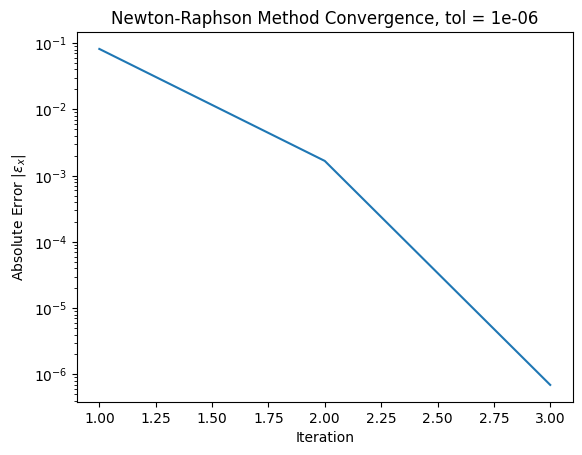

In [18]:
x0 = -0.5
tol = 1e-6

xNew, iterations, errors = newton_raphson(f,df,x0,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Newton-Raphson Method Convergence, tol = {tol}')
plt.show()

# Halley Cubic Method

Halley Cubic Algorithm

In [19]:
def halley(func,dFunc,ddFunc,x0,tol,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - ddFunc: 2nd derivative function handle
    #   - x0: initial guess
    #   - tol: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** HALLEY CUBIC METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []
    xNew = x0

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if 2*dFunc(x0)**2 - func(x0)*ddFunc(x0) == 0:
            print(f'ERROR: Divide by zero')
            break

        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Halley Cubic algorithm
        xNew = x0 - 2*func(x0)*dFunc(x0) / (2*dFunc(x0)**2 - func(x0)*ddFunc(x0))
        x0 = xNew

        # compute new absolute error
        epsX = abs(func(xNew) / dFunc(xNew))

        # log iteration and error
        iterations.append(i)
        errors.append(epsX)
        
        # set new tolerance condition for the while loop to check
        condition = epsX > tol

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')
        
    return xNew, iterations, errors

Test the Algorithm and plot it

*** HALLEY CUBIC METHOD ***
final x-value: -0.9999999008762737
iterations: 2
error: -3.9649489558257756e-07



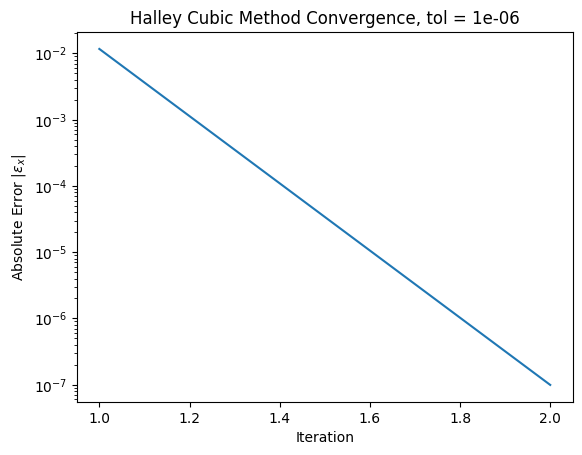

In [20]:
x0 = -0.5
tol = 1e-6

xNew, iterations, errors = halley(f,df,ddf,x0,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Halley Cubic Method Convergence, tol = {tol}')
plt.show()

Visualize fixed-point function

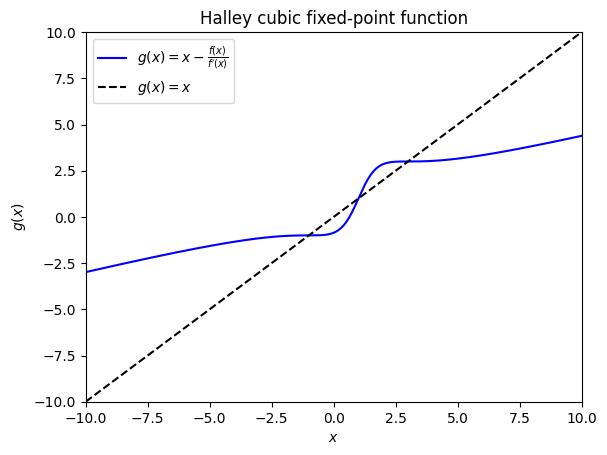

In [21]:
def h(func,dFunc,ddFunc,x):
    return x - 2*func(x)*dFunc(x) / (2*dFunc(x)**2 - func(x)*ddFunc(x))

x = np.linspace(-10,10,500)

plt.plot(x,h(f,df,ddf,x),'b',label=r'$g(x) = x - \frac{f(x)}{f^\prime(x)}$')
plt.plot(x,x,'k--',label=r'$g(x) = x$')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.title(r'Halley cubic fixed-point function')
plt.legend()
plt.show()

Range of convergence

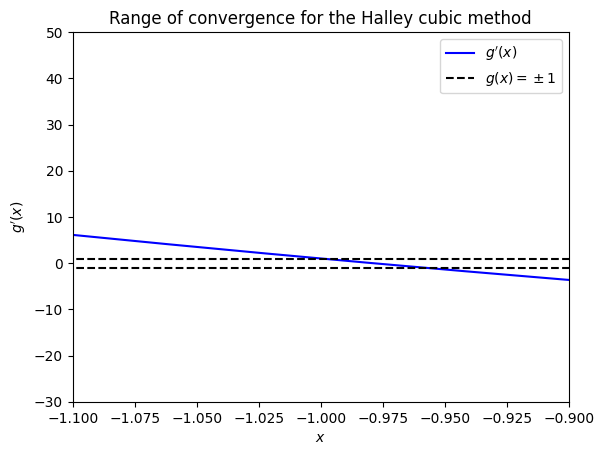

In [22]:
def dh(func,dFunc,ddFunc,dddFunc,x):
    den1 = 2*dFunc(x)**2 - func(x)*ddFunc(x)

    num1 = den1 * 2*(dFunc(x)**2 + func(x)*ddFunc(x))
    num2 = (2*func(x)*dFunc(x)) * 2*den1*(4*dFunc(x)*ddFunc(x) - (dFunc(x)*ddFunc(x) + func(x)*dddFunc(x)))

    return (num1 + num2) / den1**2

x = np.linspace(-10,10,500)

plt.plot(x,dh(f,df,ddf,dddf,x),'b-',label=r'$g^\prime(x)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$g(x) = \pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-1.1,-0.9])
plt.ylim([-30,50])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Range of convergence for the Halley cubic method')
plt.legend()
plt.show()

# Compare Methods

Compute convergence rates

In [23]:
def convergenceRate(errors):
    validErrors = np.asarray(errors)
    validErrors = validErrors[validErrors>0]

    e1 = validErrors[-3]
    e2 = validErrors[-2]
    e3 = validErrors[-1]

    num = np.log(e3) - np.log(e2)
    den = np.log(e2) - np.log(e1)

    return num/den

Compute the roots and rates of convergence of the function with each method

In [24]:
# left/right bounds for Bisection, Secant, and Regula-Falsi
xLeft = -5
xRight = 1
# initial guess for Fixed-Point and Newton-Raphson
xGuess = -5
# tolerance
tol = 1e-10

# Compute roots
xNew1, iterations1, errors1 = bisection(f,df,xLeft,xRight,tol)
xNew2, iterations2, errors2 = secant(f,df,xLeft,xRight,tol)
xNew3, iterations3, errors3 = regula_falsi(f,df,xLeft,xRight,tol)
xNew4, iterations4, errors4 = fixed_point_iteration(f,df,g2,xGuess,tol)
xNew5, iterations5, errors5 = newton_raphson(f,df,xGuess,tol)
xNew6, iterations6, errors6 = halley(f,df,ddf,xGuess,tol)

# Compute rates of convergence
alpha1 = convergenceRate(errors1)
alpha2 = convergenceRate(errors2)
alpha3 = convergenceRate(errors3)
alpha4 = convergenceRate(errors4)
alpha5 = convergenceRate(errors5)
alpha6 = convergenceRate(errors6)

*** BISECTION METHOD ***
final x-value: -1.0000000000582077
iterations: 35
absolute error: 2.3283064365386963e-10

*** SECANT METHOD ***
final x-value: -0.9999999999999999
iterations: 10
error: -4.440892098500626e-16

*** REGULA-FALSI METHOD ***
final x-value: -0.9999999999417923
iterations: 36
error: -2.3283064365386963e-10

*** FIXED POINT ITERATION METHOD ***
final x-value: -1.0000000000637328
iterations: 22
error: 2.5493118727126785e-10

*** NEWTON-RAPHSON METHOD ***
final x-value: -1.0
iterations: 6
error: 0.0

*** HALLEY CUBIC METHOD ***
final x-value: -1.0
iterations: 4
error: 0.0



Plot the convergence for all methods

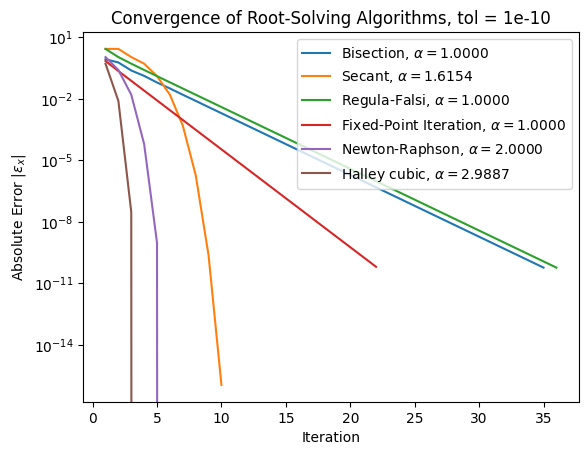

In [25]:
plt.semilogy(iterations1,errors1,label=fr'Bisection, $\alpha={alpha1:0.4f}$')
plt.semilogy(iterations2,errors2,label=fr'Secant, $\alpha={alpha2:0.4f}$')
plt.semilogy(iterations3,errors3,label=fr'Regula-Falsi, $\alpha={alpha3:0.4f}$')
plt.semilogy(iterations4,errors4,label=fr'Fixed-Point Iteration, $\alpha={alpha4:0.4f}$')
plt.semilogy(iterations5,errors5,label=fr'Newton-Raphson, $\alpha={alpha5:0.4f}$')
plt.semilogy(iterations6,errors6,label=fr'Halley cubic, $\alpha={alpha6:0.4f}$')
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Convergence of Root-Solving Algorithms, tol = {tol}')
plt.legend(loc='upper right')
plt.show()